# IEOR 4501 Final Project
## Group Xueba
### Install needed modules for the project

In [ ]:
!pip install pyecharts

### Import necessary modules

In [2]:
import requests 
from bs4 import BeautifulSoup 
import re
import numpy as np
import pandas as pd
from pyecharts import Page, Pie, Bar  
import matplotlib.pyplot as plt
import seaborn as sns

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/huqinming/anaconda3/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


### Start Web Requsets

In [3]:
def start_requests(url):
    r = requests.get(url)
    return r.content

### Getting Data

In [4]:
movie_Dict = {'Name':[],'Year':[], 'Level':[], 'Genre':[], 'Score':[], 'Director':[], 'Votes':[], 'Gross_in_Million':[]}
# Put all movies information into a dictionary (all info of a type as list): easy for table
movie_List = []
# Put all movies information into a List (each movie as dictionary): easy for chart

def parse(text):
    soup = BeautifulSoup(text, 'html.parser')
    movie_list = soup.find_all('div', class_ = 'lister-item-content') # 'div class' list all info. of each movie
    for movie in movie_list:
        movies_Name = movie.find_all('a')[0].text
        movies_Year = movie.find_all('span')[1].text
        movies_ReleaseYear = re.findall(r'\d{4}', movies_Year)[0]
        try:
            movies_R_Level = movie.find_all('span', class_ = 'certificate')[0].text.strip()
        except:
            movies_R_Level = 'None'
        movies_Genre = movie.find_all('span', class_ = 'genre')[0].text.strip().replace(',','')
        try:
            movies_Score = float(movie.find_all('div', class_ = 'inline-block ratings-imdb-rating')[0]['data-value'])
        except:
            movies_Score = 0
        movies_Director = movie.find_all('p')[2].find_all('a')[0].text
        try: 
            movies_Votes = int(movie.find_all('p')[3].find_all('span')[1]['data-value'])
        except:
            movies_Votes = 0
        try: 
            movies_Gross = int(movie.find_all('p')[3].find_all('span')[4]['data-value'].replace(',',''))/1000000
        except:
            movies_Gross = 0
            
        movie_Dict['Name'].append(movies_Name)
        movie_Dict['Year'].append(movies_ReleaseYear)
        movie_Dict['Level'].append(movies_R_Level)
        movie_Dict['Genre'].append(movies_Genre)
        movie_Dict['Score'].append(movies_Score)
        movie_Dict['Director'].append(movies_Director)
        movie_Dict['Votes'].append(movies_Votes)
        movie_Dict['Gross_in_Million'].append(movies_Gross)
        
        movie_List.append({'Name': movies_Name, 'Year': movies_ReleaseYear, 'Level':movies_R_Level, 
                            'Genre': movies_Genre, 'Score': movies_Score, 'Director':movies_Director, 'Votes': movies_Votes, 'Gross_in_Million)':movies_Gross})

def main():
    for i in range(5):
        x = 1 + (i * 50)
        url = f'https://www.imdb.com/search/title?title_type=feature&start={x}&ref_=adv_nxt'
        text = start_requests(url)
        parse(text)

if __name__ == '__main__':
    main()

#print(movie_Dict)
#print(movie_List)


### Creating Dataframe

In [5]:
Dataframe = pd.DataFrame(movie_Dict)   #organize data we got into a csv file to make it clear
Dataframe[[ 'Name','Year','Level', 'Genre','Score','Director','Votes','Gross_in_Million']].to_csv('movies.csv') #export data to csv

In [6]:
movies_table = pd.read_csv("movies.csv") #read csv file in python
Dataframe = movies_table[['Name','Year','Level', 'Genre','Score','Director','Votes','Gross_in_Million']]#create table
Dataframe.head(50) #use 50 movies as example

,Name,Year,Level,Genre,Score,Director,Votes,Gross_in_Million
0,Fantastic Beasts: The Crimes of Grindelwald,2018,PG-13,Adventure Family Fantasy,6.9,David Yates,67727,123.141406
1,The Ballad of Buster Scruggs,2018,R,Comedy Drama Musical,7.4,Ethan Coen,28672,0.000000
2,Bohemian Rhapsody,2018,PG-13,Biography Drama Music,8.4,Bryan Singer,130232,156.323150
3,Creed II,2018,PG-13,Drama Sport,8.0,Steven Caple Jr.,9678,64.336284
4,The Lion King,2019,None,Animation Adventure Drama,0.0,Jon Favreau,0,0.000000
5,Ralph Breaks the Internet,2018,PG,Animation Adventure Comedy,7.6,Phil Johnston,10891,93.538233
6,Robin Hood,2018,PG-13,Action Adventure Thriller,5.3,Otto Bathurst,6218,17.027682
7,Widows,2018,R,Crime Drama Thriller,7.4,Steve McQueen,14974,28.660245
8,A Star Is Born,2018,R,Drama Music Romance,8.2,Bradley Cooper,106259,191.917436
9,Aquaman,2018,PG-13,Action Adventure Fantasy,0.0,James Wan,0,0.000000


### Some Basic Data Analysis
#### 1. Building a Pie Chart relating Movie Genres

In [7]:
types = movie_Dict['Genre']   #select 'genre' from data set
#print(types)
type_count = {}    #into dict
for x in types:     #count no. of movies in each genre
    type_list = x.strip().split()
    for y in type_list:
        if y not in type_count:
            type_count[y] = 1
        else:
            type_count[y] += 1


pie_graph = Pie('Percentage of Movie Genres',title_pos= 'center', width = 900  )  #draw pie_graph by using pyechart
pie_graph.add('', list(type_count.keys()),list(type_count.values()), is_label_show=True, is_legend_show = True,
              legend_orient='vertical', legend_pos='right')
pie_graph.render() #this command gives a html file called pie.html in our project folder. 

In [8]:
pie_graph #display the graph but it cannot be seen on github #use the html file to view

#### 2. Counting Movie Genres and Building a Histagram

In [9]:
unique_genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War']
#new data set

In [10]:
genre_count = [] #count no. of movies in different genres
for genre in unique_genres:    
    count = Dataframe['Genre'].str.contains(genre)
    genre_count.append([genre,len(Dataframe[count])])
genreCountDF = pd.DataFrame(genre_count, columns = ['Genre','Count']) #put data in a csv file
genreSorted = genreCountDF.sort_values(by=['Count'], ascending=False) #sort data in ascending order
top5genre = genreSorted[:5]
genreSorted  

,Genre,Count
6,Drama,116
1,Adventure,99
0,Action,84
4,Comedy,60
5,Crime,42
8,Fantasy,41
17,Thriller,36
15,Sci-Fi,32
7,Family,31
10,Horror,25


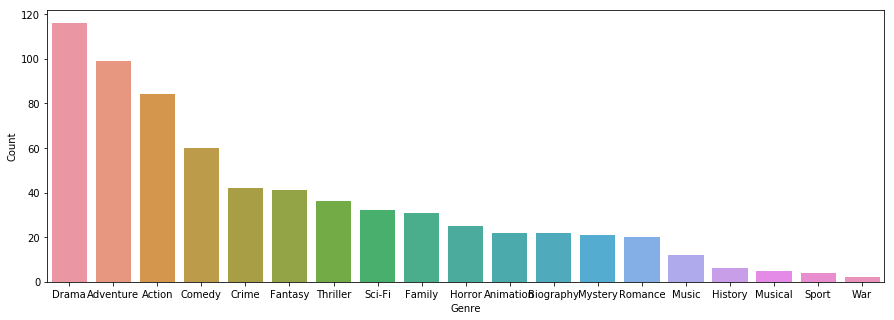

In [11]:
fig, ax = plt.subplots(figsize=(15,5)) 
sns.barplot(x = 'Genre', y = 'Count', data = genreSorted[:19]) 
#create barplot by using seaborn

#### 3. Ranking Votes of Movies

In [12]:
votes_list= sorted(movie_List , key = lambda x: int(x['Votes']))  #sort votes by descinding order
 
names = [i['Name'] for i in votes_list]

votes = [x['Votes'] for x in votes_list]  #select variables 

votes_bar_chart = Bar('Ranking of Votes', title_pos= 'center', width = 900) #title of the graph
votes_bar_chart.add('',names[-20:],votes[-20:],is_label_show=True,is_convert=True #draw bar chart using pyecharts
                    ,datazoom_type='inside', label_pos='right',xaxis_name='Number of Votes',)

votes_bar_chart.render() #this command gives a html file called votes_bar_chart.html in our project folder.

In [13]:
votes_bar_chart #display the graph but it cannot be seen on github #use the html file to view

#### 4. Movie Score Frequency Analysis

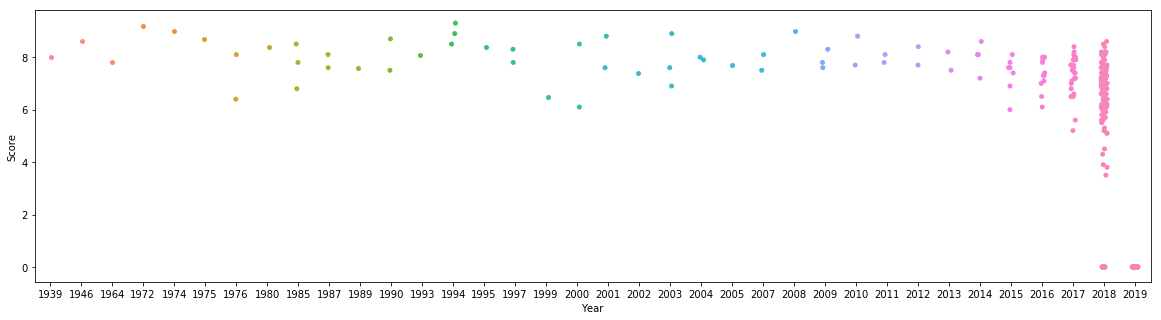

In [14]:
fig, ax = plt.subplots(figsize=(20,5))  
sns.stripplot(x = 'Year', y = 'Score', data = Dataframe)
# create scatter idagram by using seaborn to tell the relationship of year and score

#### 5. Score Frequency Analysis

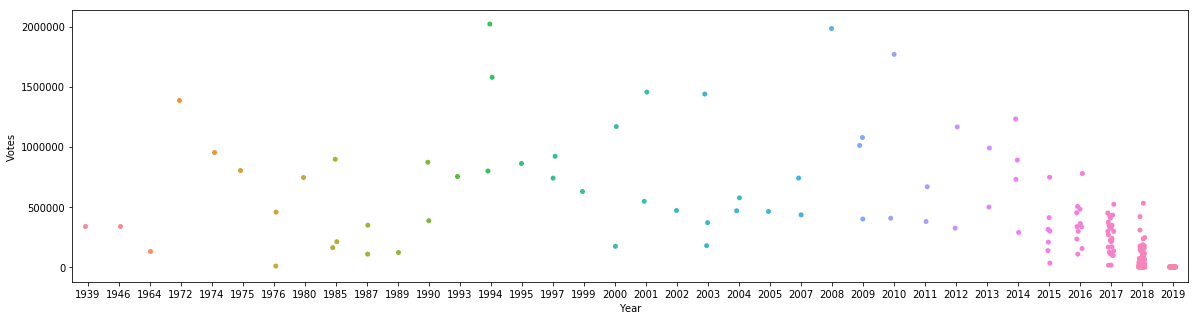

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
sns.stripplot(x = 'Year', y = 'Votes', data = Dataframe)
# create scatter idagram by using seaborn to tell the relationship of year and Votes

#### 6. Votes and gross chart

In [16]:
Dataframe[['Votes','Gross_in_Million']].to_csv('Votes&Gross.csv')  #imports rows and gross data into a new csv file
movies_table2 = pd.read_csv("Votes&Gross.csv") #read csv file 
Data = movies_table2[[ 'Votes', 'Gross_in_Million']]  #create table

Data.head(30) #show 30 movies with votes and gross

,Votes,Gross_in_Million
0,67727,123.141406
1,28672,0.000000
2,130232,156.323150
3,9678,64.336284
4,0,0.000000
5,10891,93.538233
6,6218,17.027682
7,14974,28.660245
8,106259,191.917436
9,0,0.000000


#### 7.Votes and gross comparison

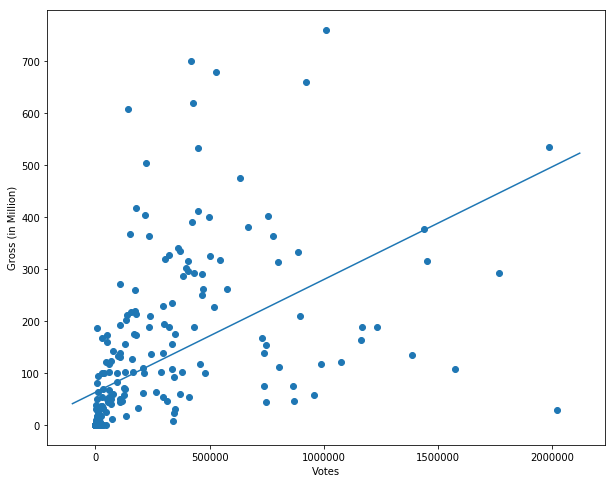

In [17]:
plt.figure(figsize=(10,8))  #define figure size
# Scatter plot
x = movie_Dict['Votes'] #horizotal axis
y = movie_Dict['Gross_in_Million']  #vertical axis
plt.scatter(x, y) #plot scatter graph using  matplotlib.pyplot
plt.xlabel('Votes')
plt.ylabel('Gross (in Million)')  #label two axises

# Add Trendline
axes = plt.gca()
m, b = np.polyfit(x, y, 1)
x_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(x_plot, m*x_plot + b, '-') #draw best fitted line to see the correlation



#### 8. Counting Restricted Levels

In [18]:
Restrict_List = Dataframe.Level.unique().tolist()   #Counts of restricted level for each movie
Dataframe.Level.value_counts().to_frame(name = 'Count')

,Count
R,92
PG-13,75
PG,38
None,34
TV-MA,3
Not Rated,3
G,2
TV-PG,2
TV-14,1


#### 9. Counting Restricted Levels Each Year

In [19]:
yearList = sorted(Dataframe.Year.unique().tolist())

def getLevelbyYear(Restrict_List, yearList, yearDf):
    dictionary = {}
    for movies_R_Level in Restrict_List:
        dictionary[movies_R_Level] = []
        for movies_ReleaseYear in yearList:
            currentDf = yearDf[yearDf.Year == movies_ReleaseYear]
            count = len(currentDf[currentDf.Level == movies_R_Level]) # count Level numbers
            dictionary[movies_R_Level].append(count) # add the data to the dictonary
    Dataframe = pd.DataFrame(dictionary, index = yearList)
    return Dataframe
# Building Level Dataframe

Level_yearDf = getLevelbyYear(Restrict_List, yearList[1:], Dataframe)
Level_yearDf

,PG-13,R,None,PG,TV-PG,TV-MA,G,Not Rated,TV-14
1946,0,0,0,1,0,0,0,0,0
1964,0,0,0,0,0,0,1,0,0
1972,0,1,0,0,0,0,0,0,0
1974,0,1,0,0,0,0,0,0,0
1975,0,1,0,0,0,0,0,0,0
1976,0,1,0,1,0,0,0,0,0
1980,0,1,0,0,0,0,0,0,0
1985,0,0,0,3,0,0,0,0,0
1987,0,1,0,1,0,0,0,0,0
1989,1,0,0,0,0,0,0,0,0


#### 10.  Restricted Level Time Analysis

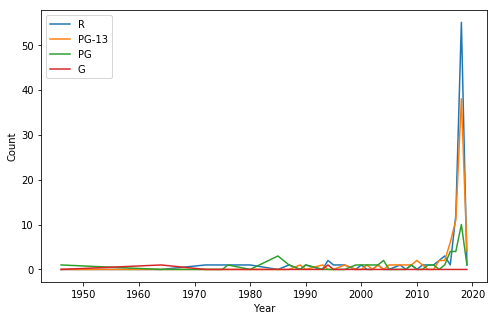

In [24]:
x = Level_yearDf.index.tolist()

plt.figure(figsize=(8,5))  #figure size

# Using Level Dataframe to build line chart
plt.plot(x, Level_yearDf.R.tolist(), label = 'R')
plt.plot(x, Level_yearDf['PG-13'].tolist(), label = 'PG-13')
plt.plot(x, Level_yearDf.PG.tolist(), label = 'PG')
plt.plot(x, Level_yearDf.G.tolist(), label = 'G')

plt.legend(loc = "upper left") #Legend Location

plt.xlabel('Year') # abscissa Label 
plt.ylabel('Count') # ordinate Label
plt.show()

#### 11. Director Analysis

In [21]:
top_Director = Dataframe.Director.value_counts()[:10].index.tolist()  #find director
directorMovieCount = Dataframe.Director.value_counts()[:10].tolist()  #count no. of movies of each director

In [27]:
def getDirectorDf(directorList, moviecountList, Dataframe):  #function to calculate data
    L = []   
    for i in range(len(directorList)):
        avgScore = Dataframe[Dataframe.Director == directorList[i]].Score.mean() #calculate average score
        totalGross = Dataframe[Dataframe.Director == directorList[i]].Gross_in_Million.sum() #calculate total gross
        rawList = [directorList[i], moviecountList[i], avgScore, totalGross] #get raw data
        L.append(rawList)
    directorDf = pd.DataFrame(L, columns = ['Director','Movie Count','Avg Score','Total Gross']) #create table
    return directorDf 

In [28]:
director_Dataframe = getDirectorDf(top_Director, directorMovieCount, Dataframe)
director_Dataframe # table of director

,Director,Movie Count,Avg Score,Total Gross
0,David Yates,6,7.516667,1628.137440
1,Quentin Tarantino,5,6.680000,445.392331
2,Christopher Nolan,4,8.575000,1203.827817
3,Chris Columbus,3,7.500000,865.325275
4,Denis Villeneuve,3,7.833333,239.489591
5,Steven Spielberg,3,7.633333,621.375795
6,Martin Scorsese,3,5.633333,163.737088
7,Jon Favreau,3,4.766667,537.399641
8,Francis Ford Coppola,2,9.100000,192.266411
9,Kenneth Branagh,2,6.700000,303.977896
